In [1]:
import matplotlib.pyplot as plt
import time
from IPython import display
from xml.dom import minidom
import math
import folium
import pandas as pd
from pandas.io.json import json_normalize
import tqdm 
import numpy as np
import geopandas as gpd
import contextily as cx
from random import randint
import json

import warnings
warnings.filterwarnings("ignore")

# Routes

In [2]:
routes= gpd.read_file('gpx/validated4-1-2023.json')

In [3]:
routes.crs

<Derived Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Turkey. Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

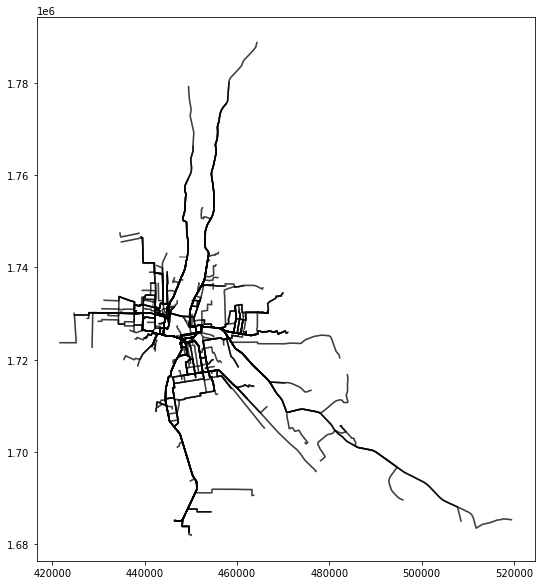

In [4]:
ax = routes.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [5]:
color = []
n = len(routes)

for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

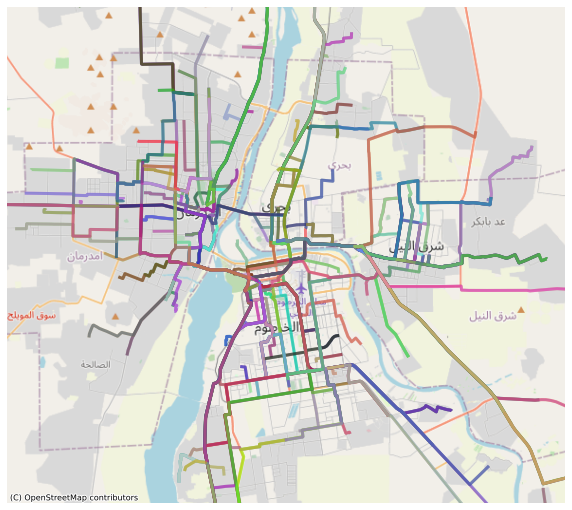

In [6]:
ax = routes.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.50, linewidth= 3, edgecolor=color, legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3600000, 3645000])
plt.ylim([1740000, 1780000])
ax.set_axis_off()

#plt.savefig('validated_map_.jpg')

In [ ]:
### TO DO ###

f = folium.Figure(width=800, height=800)

the_map= folium.Map(location=[15.5007, 32.5599],
                    zoom_start = 17, tiles='openstreetmap').add_to(f)
add_all_tiles(the_map)

folium.PolyLine(routes.geometry[0]).add_to(the_map_map)

# Add layer control to change tiles:
folium.LayerControl(sortLayers=True).add_to(the_map)

# To store the map as a HTML page:
# the_map.save('map_001.html')

# To display the map in a Jupyter notebook:
the_map

# Neighborhoods

In [45]:
#for neighborhoods geojson
from shapely import wkt

neighborhoods= gpd.read_file('krt_neighborhoods.json')

neighborhoods['PAU_NAME']= neighborhoods.PAU_NAME.str.encode('cp1252')
neighborhoods['PAU_NAME']= neighborhoods.PAU_NAME.str.decode('cp1256')

neighborhoods['Loc_Name']= neighborhoods.Loc_Name.str.encode('cp1252')
neighborhoods['Loc_Name']= neighborhoods.Loc_Name.str.decode('cp1256')

neighborhoods['AU_Name']= neighborhoods.AU_Name.str.encode('cp1252')
neighborhoods['AU_Name']= neighborhoods.AU_Name.str.decode('cp1256')

neighborhoods['PAU_NAME_1']= neighborhoods.PAU_NAME_1.str.encode('cp1252')
neighborhoods['PAU_NAME_1']= neighborhoods.PAU_NAME_1.str.decode('cp1256')

neighborhoods['Loc_Name_1']= neighborhoods.Loc_Name_1.str.encode('cp1252')
neighborhoods['Loc_Name_1']= neighborhoods.Loc_Name_1.str.decode('cp1256')

neighborhoods['AU_Name_1']= neighborhoods.AU_Name_1.str.encode('cp1252')
neighborhoods['AU_Name_1']= neighborhoods.AU_Name_1.str.decode('cp1256')

In [46]:
neighborhoods.columns = [x.lower() for x in neighborhoods.columns]
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

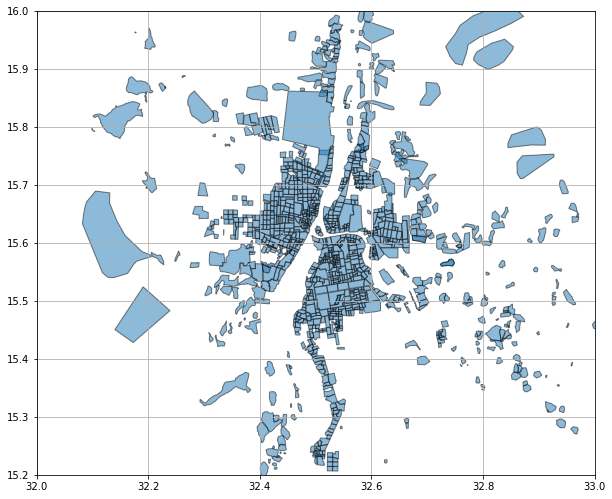

In [47]:
ax = neighborhoods.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
plt.xlim([32.00, 33.00])
plt.ylim([15.20, 16.00])
plt.grid()

In [10]:
color = []
n = len(neighborhoods)

for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

In [11]:
#neighborhoods['House_Hold']= neighborhoods.House_Hold.replace(' ', 0).astype('int')
neighborhoods= neighborhoods.drop(neighborhoods[neighborhoods.house_hold == ' '].index.values)
neighborhoods['house_hold']= neighborhoods.house_hold.astype('int')
neighborhoods= neighborhoods[neighborhoods.house_hold <= 3000] #filtering out one extreme neigborhood

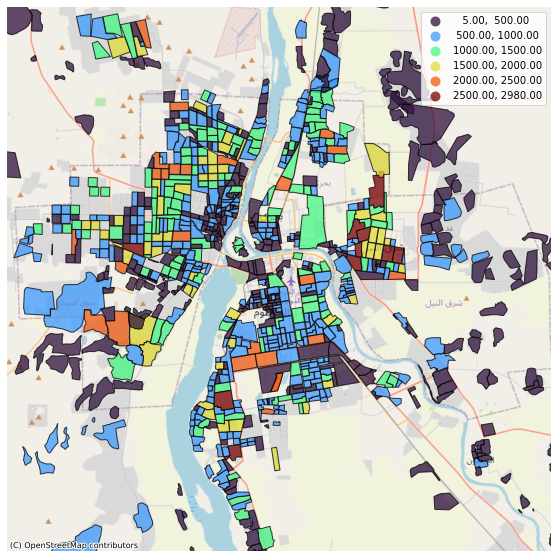

In [12]:
#ax = neighborhoods.to_crs(epsg=3857).plot(figsize=(20, 20), alpha=0.75, linewidth= 1, edgecolor='k', legend= True)
ax = neighborhoods.to_crs(epsg=3857).plot(column= 'house_hold', figsize=(10, 10), alpha=0.75, cmap= 'turbo',
                                          scheme= 'user_defined',
                                          classification_kwds=dict(bins=[500, 1000, 1500, 2000, 2500]),
                                          linewidth= 1, edgecolor='k', legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3595000, 3650000])
plt.ylim([1730000, 1785000])
ax.set_axis_off()

#plt.savefig('neighborhood_map.jpg')

## Survey Responses

In [13]:
data= pd.read_excel('survey_responses.xlsx')
#data= pd.read_csv('matched_responces.csv') #for reading processed data

data.head()

,Timestamp,per_day,concerns,purpose,origin,start_time,duration,route,access,access_time,...,household,household_youth,cars,destination,stages,origin_locality,destination_locality,per_week,comments,consent
0,2023-03-03 16:24:40.582,1 to 2 days per week,"Cost, Availability, Overcrowding, Reliability ...","Shopping (self), Social trips/visits",ab,00:12:00,45-60 mins,ab-cd,Raksha,5-10 mins,...,1.0,1.0,2,cd,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-06 10:55:22.508,2 times/day - مرتين في اليوم,"Cost - السعر, Driver Behavior - سلوك السائقي...","Work - للوصول لمكان العمل, School/University ...",المهندسين,08:00:00,15-30 mins - بين 15-30 دقيقة,عربي- بري,Ride with friend - بوصلك صاحبك/ملحة/سيفتي؟,NaN,...,4.0,0.0,1,الخرطوم شرق,2,Omdurman - أمدرمان,Khartoum - الخرطوم,1 to 2 days per week - يوم إلى يومين في الاسبوع,NaN,NaN
2,2023-03-06 10:56:20.084,Occasionally - أحياناً,Personal Safety - السلامة الشخصية,"Work - للوصول لمكان العمل, School/University ...",الأزهري,08:00:00,15-30 mins - بين 15-30 دقيقة,المركز الإسلامي - جامعة السودان العالمية الازهري,Walk - عن طريق المشي (كداري),Less than 5 mins - أقل من 5 دقايق,...,5.0,5.0,2,اركويت,2,Khartoum - الخرطوم,Khartoum - الخرطوم,1 to 2 days per week - يوم إلى يومين في الاسبوع,NaN,NaN
3,2023-03-06 11:33:32.494,More than 2 times/day - أكثر من مرتين في اليوم,"Cost - السعر, Availability - توفر المواصلات,...","Work - للوصول لمكان العمل, School/University ...",جبره الاسكان,07:00:00,45-60 mins - بيبن 45 - 60 دقيقة,السوق المركزي - الكدرو,Ride with friend - بوصلك صاحبك/ملحة/سيفتي؟,10-20 mins - من 10-20 دقيقة,...,3.0,0.0,1,جامعه بحري,3+ (أو اكثر),Khartoum - الخرطوم,Bahri - بحري,Everyday - كل أيام الاسبوع,NaN,NaN
4,2023-03-06 12:15:43.167,More than 2 times/day - أكثر من مرتين في اليوم,Overcrowding - زحمة المواصلات,"Work - للوصول لمكان العمل, School/University ...",صالحة,08:00:00,> 120 mins - أكثر من 120 دقيقة,صالحة-عربي,Walk - عن طريق المشي (كداري),Less than 5 mins - أقل من 5 دقايق,...,6.0,1.0,1,المنشية,3+ (أو اكثر),Omdurman - أمدرمان,Khartoum - الخرطوم,3 to 5 days per week - ثلاثه الى خمسه أيام في ...,NaN,NaN


count      4707.000000
mean      21735.679839
std       17800.398846
min           0.000000
25%       10000.000000
50%       20000.000000
75%       30000.000000
max      100000.000000
Name: cost, dtype: float64


<AxesSubplot:>

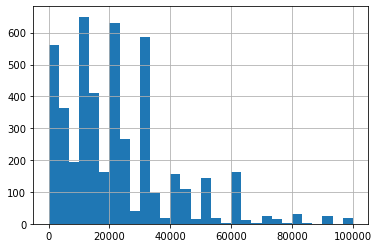

In [14]:
print(data.cost.describe())
data.cost.hist(bins=30)

count    5775.000000
mean        6.117576
std        10.800159
min         0.000000
25%         4.000000
50%         5.000000
75%         7.000000
max       600.000000
Name: household, dtype: float64


<AxesSubplot:>

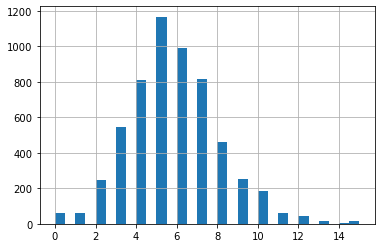

In [15]:
print(data.household.describe())
data[data.household <= 15].household.hist(bins=30)

count    5775.000000
mean        2.014545
std         6.005003
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       420.000000
Name: household_youth, dtype: float64


<AxesSubplot:>

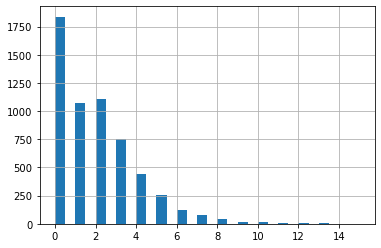

In [16]:
print(data.household_youth.describe())
data[data.household_youth <= 15].household_youth.hist(bins=30)

In [22]:
data.Timestamp

0      2023-03-03 16:24:40.582
1      2023-03-06 10:55:22.508
2      2023-03-06 10:56:20.084
3      2023-03-06 11:33:32.494
4      2023-03-06 12:15:43.167
                 ...          
5839   2023-03-20 03:12:40.862
5840   2023-03-20 04:44:24.342
5841   2023-03-20 05:44:59.068
5842   2023-03-20 06:53:43.275
5843   2023-03-20 11:27:30.198
Name: Timestamp, Length: 5844, dtype: datetime64[ns]

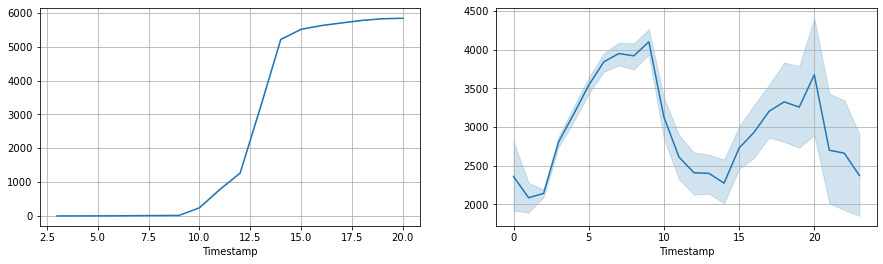

In [34]:
import seaborn as sns
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(x= data.Timestamp.dt.day, y= data.index.values)
plt.grid()

plt.subplot(1,2,2)
sns.lineplot(x= data.Timestamp.dt.hour, y= data.index.values) #Hour is in US EST (KRT - 6)
plt.grid()

In [35]:
print(data.origin.value_counts())
print(data.destination.value_counts())

جبره                    177
اركويت                  103
الثوره                  100
الازهري                  92
كافوري                   87
                       ... 
الحاره 75                 1
حي النصر مايو             1
الحاج يوسف _الردميه       1
ام ضون بان حي السمره      1
Al SAFIYA                 1
Name: origin, Length: 1885, dtype: int64
السوق العربي         450
العربي               305
السوق العربي         185
الخرطوم              132
الرياض               124
                    ... 
كافوري القنطره         1
الرياض العمل           1
بنك فيصل الاستاد       1
مجموعه دال             1
Sudan University       1
Name: destination, Length: 1681, dtype: int64


In [36]:
data['origin']= data.origin.astype('str').apply(lambda x: x.replace('أ','ا').replace('ة','ه').replace('ى','ي'))
data['destination']= data.destination.astype('str').apply(lambda x: x.replace('أ','ا').replace('ة','ه').replace('ى','ي'))
print(data.origin.value_counts())
print(data.destination.value_counts())

جبره                    177
اركويت                  103
الثوره                  100
الازهري                  92
كافوري                   87
                       ... 
الحاره 75                 1
حي النصر مايو             1
الحاج يوسف _الردميه       1
ام ضون بان حي السمره      1
Al SAFIYA                 1
Name: origin, Length: 1885, dtype: int64
السوق العربي         450
العربي               305
السوق العربي         185
الخرطوم              132
الرياض               124
                    ... 
كافوري القنطره         1
الرياض العمل           1
بنك فيصل الاستاد       1
مجموعه دال             1
Sudan University       1
Name: destination, Length: 1681, dtype: int64


In [48]:
#get counts
neighborhoods.loc_name.value_counts()

شرق النيل     262
جبل أولياء    193
امدرمان       189
الخرطوم       174
أم بده        157
كررى          135
بحري           95
بحرى شمال      86
كرري           42
جبل اولياء      8
بحرى            3
ام بده          1
Name: loc_name, dtype: int64

In [49]:
#fix naming
neighborhoods.loc_name[neighborhoods.loc_name == 'بحرى شمال'] = 'بحري'
neighborhoods['loc_name']= neighborhoods.loc_name.apply(lambda x: x.replace('أ','ا').replace('ة','ه').replace('ى','ي'))
neighborhoods['au_name']= neighborhoods.au_name.apply(lambda x: x.replace('أ','ا').replace('ة','ه').replace('ى','ي'))
neighborhoods.loc_name.value_counts()

شرق النيل     262
جبل اولياء    201
امدرمان       189
بحري          184
كرري          177
الخرطوم       174
ام بده        158
Name: loc_name, dtype: int64

<AxesSubplot:>

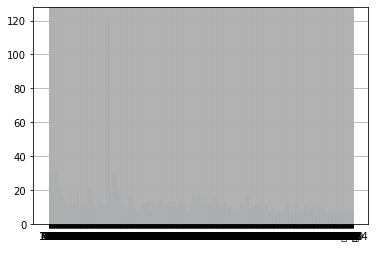

In [50]:
neighborhoods.dropna(subset=['fid'], inplace= True)
neighborhoods.reset_index(drop= True, inplace= True)
neighborhoods.house_hold.hist(bins= 100)

In [51]:
neighborhoods.groupby(['loc_name', 'au_name'])[['fid']].count()

fid
loc_name   au_name           
الخرطوم    الخرطوم شرق     35
           الخرطوم شمال    31
           الخرطوم غرب     17
           الخرطوم وسط     32
           الشجره          18
           الشهداء وسوبا   40
           الكلاكلات        1
ام بده     الامير          34
           البقعه          39
           الريف الغربي    46
           السلام          39
امدرمان    ابو سعد         44
           ابو عنجه        13
           الريف الجنوبي   71
           الفتيحاب        12
           المورده         14
           حي العرب        18
           ود نوباوي       17
بحري       الجيلي          48
           السليت          38
           بحري             1
           بحري شمال       56
           بلديه بحري      40
           شرق النيل        1
جبل اولياء الازهري         39
           الكلاكلات       46
           النصر           47
           جبل اولياء      69
شرق النيل  الحاج يوسف      19
           العسيلات        13
           العيلفون        38
           ام ضوابان       38
           شرق النيل       52
           وادي ابو صالح   42
           وادي سوبا       60
كرري       الثورات         38
           الريف الشمالي   68
           كرري            71

In [52]:
trial= ['الخرطوم شرق', 'اركويت جامعه', 'الكلاكلة', 'كافوري', 'صالحه', 'الأزهري', 'المهندسين', 'الدروشاب']

In [53]:
#using difflib
import difflib
def string_similarity(str1, str2):
    str1= ''.join([i for i in str1 if not i.isdigit()])
    str2= ''.join([i for i in str2 if not i.isdigit()])
    str2= str2.replace('أ','ا').replace('ة','ه').replace('ى','ي')
    #str2= str2[:len(str2.partition(' ')[0])+3]
    str1= str1.replace('أ','ا').replace('ة','ه').replace('ى','ي')[:len(str2)]
    result =  difflib.SequenceMatcher(a=str1, b=str2)
    return result.ratio()

In [54]:
#using bioalign
from Bio.Align import PairwiseAligner
def string_similarity_(str1, str2):
    aligner = PairwiseAligner()
    return aligner.score(str1, str2)/len(str2)

In [55]:
match= []

for t in range(len(trial)):
    max_score= 0
    max_index= 0
    for n in range(len(neighborhoods.pau_name)):
        score= string_similarity(neighborhoods.pau_name.iat[n], trial[t])
#         score_au= string_similarity(neighborhoods.au_name.iat[n], trial[t])
#         score = score_au if score_au > score else score
        #score= string_similarity(str(neighborhoods.pau_name[n].replace('أ','ا').replace('ة','ه')),
        #                         str(trial[t].replace('أ','ا').replace('ة','ه')))
        #score= string_similarity(str(neighborhoods.pau_name[n].encode), str(trial[t].encode))
        #max_score= score if score > max_score else score
        if score > max_score:
            max_score = score
            max_index = n
    if max_score < 0.65:
        match.append([trial[t], 'No Match Found', round(max_score,3)])
    else:
        match.append([trial[t], neighborhoods.pau_name.iat[max_index], round(max_score,3)])

In [56]:
print(match)

[['الخرطوم شرق', 'الخرطوم 3 شرق', 0.909], ['اركويت جامعه', 'اركويت مربع61', 0.783], ['الكلاكلة', 'الكواهلة', 0.75], ['كافوري', 'كافوري', 1.0], ['صالحه', 'صالحة شرق', 1.0], ['الأزهري', 'الازهري م2-6', 1.0], ['المهندسين', 'المهندسين م29', 1.0], ['الدروشاب', 'الدروشاب جنوب مربع1', 1.0]]


In [ ]:
#for survey data
data['matched_origin'] = None
data['matching_score'] = 0

with tqdm.tqdm(total= len(data), position=0, leave=True) as pbar:
    for o in range(len(data)):
        pbar.update(1)
        max_score= 0
        max_index= 0
        for n in range(len(neighborhoods.pau_name)):
            score= string_similarity(neighborhoods.pau_name.iat[n], data.origin[o])
#             score_au= string_similarity(neighborhoods.au_name.iat[n], data.origin[o])
#             score = score_au if score_au > score else score

            if score > max_score:
                max_score = score
                max_index = n
        if max_score < 0.70:
            data.at[o, 'matched_origin'] = 'No Match Found'
        else:
            data.at[o, 'matched_origin'] = neighborhoods.pau_name.iat[max_index]
            data.at[o, 'matching_score'] = round(max_score,3)

In [ ]:
#show matching diagnostics
print(f'Percent unmatched= {round(len(data[data.matched_origin == "No Match Found"])/len(data),3)*100}')
data[['origin', 'matched_origin', 'matching_score']]

In [ ]:
#similarly for destinations
#for survey data
data['matched_destination'] = None
data['matching_score_d'] = 0

with tqdm.tqdm(total= len(data), position=0, leave=True) as pbar:
    for o in range(len(data)):
        pbar.update(1)
        max_score= 0
        max_index= 0
        for n in range(len(neighborhoods.pau_name)):
            score= string_similarity(neighborhoods.pau_name.iat[n], data.destination[o])
            if score > max_score:
                max_score = score
                max_index = n
        if max_score < 0.70:
            data.at[o, 'matched_destination'] = 'No Match Found'
        else:
            data.at[o, 'matched_destination'] = neighborhoods.pau_name.iat[max_index]
            data.at[o, 'matching_score_d'] = round(max_score,3)
            
print(f'Percent unmatched= {round(len(data[data.matched_destination == "No Match Found"])/len(data),3)*100}')
data[['destination', 'matched_destination', 'matching_score_d']]

In [ ]:
neighborhoods['survey_count'] = 0

with tqdm.tqdm(total= len(neighborhoods), position= 0, leave= True) as pbar:
    for n in range(len(neighborhoods)):
        pbar.update(1)
        try:
            neighborhoods.survey_count.iat[n]= data.matched_origin.value_counts()[neighborhoods.pau_name.iat[n]]
        except:
            continue

In [ ]:
ax = neighborhoods.to_crs(epsg=3857).plot(column= 'survey_count', figsize=(15, 15), alpha=0.75, cmap= 'turbo',
                                          scheme= 'user_defined',
                                          classification_kwds=dict(bins=[1, 10,20,30,40,50]),
                                          linewidth= 1, edgecolor='k', legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3595000, 3650000])
plt.ylim([1730000, 1785000])
ax.set_axis_off()

#plt.savefig('validated_map_.jpg')

# using GeoCode

In [ ]:
gcd_data= data[data.matched_origin == 'No Match Found']

In [ ]:
gcd_data['location'] = gcd_data.origin+', الخرطوم, السودان'

In [ ]:
test= gpd.tools.geocode(gcd_data.location.sample(20))
test= test.to_crs(epsg=4326)

In [ ]:
ax = neighborhoods.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
test.plot(ax=ax, c='r')
plt.xlim([32.00, 33.00])
plt.ylim([15.20, 16.00])
plt.grid()

In [ ]:
from shapely.geometry import Point, Polygon

test['pau_name'] = 'Unknown'
with tqdm.tqdm(total= len(test), position=0, leave=True) as pbar:
    for i in range(len(test)):
        pbar.update(1)
        for j in range(len(neighborhoods)):
            try:
                if Polygon(neighborhoods.geometry.iat[j]).contains(Point(test.geometry.iat[i])):
                    test.pau_name.iat[i]= neighborhoods.pau_name.iat[j]
            except:
                continue

In [ ]:
#geocode everything

counter = 0
batch = 10
gcd = pd.DataFrame()

with tqdm.tqdm(total= np.ceil(len(gcd_data)/batch), position=0, leave=True) as pbar:
    for i in range(int(np.ceil(len(gcd_data)/batch))):
        pbar.update(1)
        test= gpd.tools.geocode(gcd_data.location[counter:counter+batch])
        gcd= pd.concat([gcd, test])
        counter += batch
        time.sleep(10) #break down requests
gcd= gcd.to_crs(epsg=4326)

In [ ]:
gcd['pau_name'] = 'Unknown'

with tqdm.tqdm(total= len(gcd), position=0, leave=True) as pbar:
    for i in range(len(gcd)):
        pbar.update(1)
        for j in range(len(neighborhoods)):
            try:
                if Polygon(neighborhoods.geometry.iat[j]).contains(Point(gcd.geometry.iat[i])):
                    gcd.pau_name.iat[i]= neighborhoods.pau_name.iat[j]
            except:
                continue

In [ ]:
for response in gcd.index.values:
    data.matched_origin.at[response] = gcd.pau_name.at[response]
    
print(f'Percent unmatched= {round(len(data[data.matched_origin == "Unknown"])/len(data),3)*100}')
data[['origin', 'matched_origin', 'matching_score']]

In [ ]:
neighborhoods['survey_count'] = 0

with tqdm.tqdm(total= len(neighborhoods), position= 0, leave= True) as pbar:
    for n in range(len(neighborhoods)):
        pbar.update(1)
        try:
            neighborhoods.survey_count.iat[n]= data.matched_origin.value_counts()[neighborhoods.pau_name.iat[n]]
        except:
            continue

In [ ]:
ax = neighborhoods.to_crs(epsg=3857).plot(column= 'survey_count', figsize=(10, 10), alpha=0.75, cmap= 'turbo',
                                          scheme= 'user_defined',
                                          classification_kwds=dict(bins=[1,20,30,40,50,100]),
                                          linewidth=1, edgecolor='k', legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3595000, 3650000])
plt.ylim([1730000, 1785000])
ax.set_axis_off()

#plt.savefig('validated_map_.jpg') #print on 20x20

In [ ]:
routes= gpd.read_file('gpx/validated4-1-2023.json')

color = []
n = len(routes)

for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

In [ ]:
ax = neighborhoods.to_crs(epsg=3857).plot(column= 'survey_count', figsize=(10, 10), alpha=0.75, cmap= 'turbo',
                                          scheme= 'user_defined',
                                          classification_kwds=dict(bins=[1,20,30,40,50,100]),
                                          linewidth= 0.50, edgecolor='k', legend= True)
routes.to_crs(epsg=3857).plot(ax=ax, alpha=1.0, linewidth= 3, edgecolor=color, legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3595000, 3650000])
plt.ylim([1730000, 1785000])
ax.set_axis_off()

#plt.savefig('routes.jpg') #print on 20x20

In [ ]:
#same thing for destinations
#if it breaks, remove everything until creating gcd and replace tqdm total - i, i range(i,int(np.ceil...))

gcd_data= data[data.matched_destination == 'No Match Found']
gcd_data['location'] = gcd_data.destination+', الخرطوم, السودان'

counter = 0
batch = 10
gcd = pd.DataFrame()
print('Geocoding in Progress...')
with tqdm.tqdm(total= np.ceil(len(gcd_data)/batch), position=0, leave=True) as pbar:
    for i in range(int(np.ceil(len(gcd_data)/batch))):
        pbar.update(1)
        test= gpd.tools.geocode(gcd_data.location[counter:counter+batch])
        gcd= pd.concat([gcd, test])
        counter += batch
        time.sleep(15) #break down requests
gcd= gcd.to_crs(epsg=4326)
gcd['pau_name'] = 'Unknown'

print('Geocoding Matching...')
with tqdm.tqdm(total= len(gcd), position=0, leave=True) as pbar:
    for i in range(len(gcd)):
        pbar.update(1)
        for j in range(len(neighborhoods)):
            try:
                if Polygon(neighborhoods.geometry.iat[j]).contains(Point(gcd.geometry.iat[i])):
                    gcd.pau_name.iat[i]= neighborhoods.pau_name.iat[j]
            except:
                continue
    
for response in gcd.index.values:
    data.matched_destination.at[response] = gcd.pau_name.at[response]
print(f'Percent unmatched= {round(len(data[data.matched_destination == "Unknown"])/len(data),3)*100}')
data[['destination', 'matched_destination', 'matching_score']]

print('Counting...')
neighborhoods['survey_count'] = 0
with tqdm.tqdm(total= len(neighborhoods), position= 0, leave= True) as pbar:
    for n in range(len(neighborhoods)):
        pbar.update(1)
        try:
            neighborhoods.survey_count.iat[n]= data.matched_destination.value_counts()[neighborhoods.pau_name.iat[n]]
        except:
            continue

print('Plotting...')           
ax = neighborhoods.to_crs(epsg=3857).plot(column= 'survey_count', figsize=(10, 10), alpha=0.75, cmap= 'turbo',
                                          scheme= 'user_defined',
                                          classification_kwds=dict(bins=[1,10,25,50,100,250]),
                                          linewidth= 1, edgecolor='k', legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3595000, 3650000])
plt.ylim([1730000, 1785000])
ax.set_axis_off()

#plt.savefig('validated_map_.jpg')

In [ ]:
#data.to_csv('matched_responces.csv', index= False)

In [ ]:
x= data.groupby(['matched_origin', 'matched_destination'])[['per_day']].count()
x.reset_index(inplace= True)
x.sort_values('per_day', ascending= False)

In [ ]:
x= data.groupby(['origin_locality', 'destination_locality'])[['per_day']].count()
x.reset_index(inplace= True)
x.sort_values('per_day', ascending= False)